In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [109]:
pd.__version__

'0.23.4'

In [110]:
#from https://www.kaggle.com/blastchar/telco-customer-churn
#but apparently from https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Intro
This is a popular dataset from Kaggle, but originally from IBM Watson.
From the Kaggle description
> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
> The raw data contains 7043 rows (customers) and 21 columns (features).

The dataset being American, the currency will be assumed to be US Dollars (USD)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Data loading
Data loaded without issues, confirmed 7043 rows, the label being the last one "Churn"

In [112]:
for column in data.columns:
    print(column,data[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

# Parameters
Looking at the different values, majority seem to be categorical values, with 3 numerical values : tenure, MonthCharges and Total Charges.
Total charges seem to be incorrectly loaded as on object probably due to soe missing values.
From Kaggle:
* TotalCharges:
> The total amount charged to the customer
* MonthCharges:
> The amount charged to the customer monthly
* tenure:
> Number of months the customer has stayed with the company

In [113]:
#TotalCharges should be a number
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors="coerce")

In [114]:
data[data.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [115]:
#Nan for Total Charges is when the tenure is 0, 
pd.np.alltrue(data.TotalCharges.isna() == (data.tenure == 0))

True

In [116]:
#Replace Nan by 0
data.TotalCharges = data.TotalCharges.fillna(0)

# Total Charges to Numeric values
Changing the parameters to TotalCharges, there appear there are 10 missing values, all how which appear in the case the tenure is O.
Maybe this is the case were the customer just started a contract (all Churn are "No").
In practice this is only 10 out of 7043 rows, so we can simply replace NaN by 0.

In [117]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Numeric parameters.
Apart from the 10 TotalCharges replaced by 0, there is no missing values in the 3 numerical values.

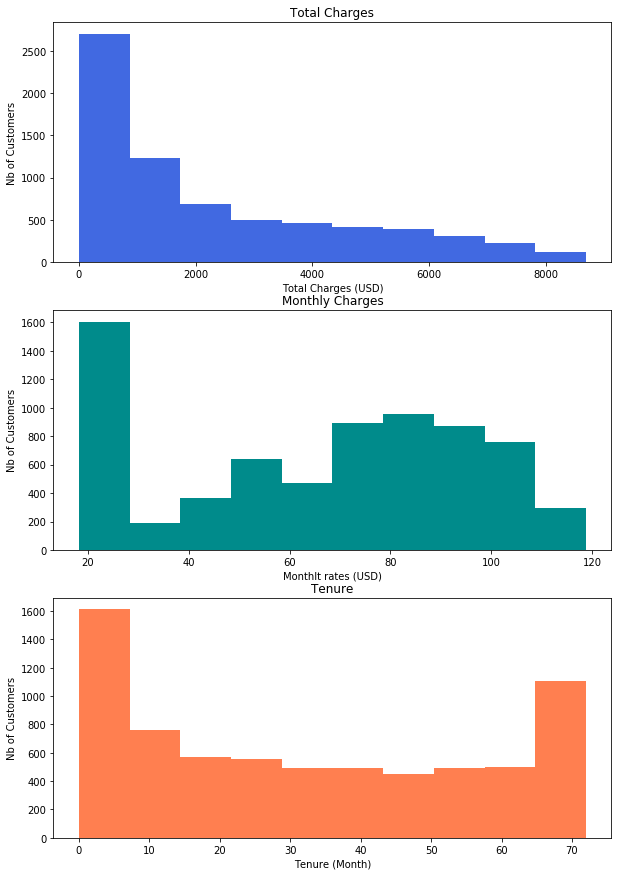

In [118]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.hist(data.TotalCharges,color='royalblue')
plt.title('Total Charges',loc='center')
plt.ylabel('Nb of Customers')
plt.xlabel('Total Charges (USD)')

plt.subplot(3, 1, 2)
plt.hist(data.MonthlyCharges,color='darkcyan')
plt.title('Monthly Charges')
plt.ylabel('Nb of Customers')
plt.xlabel('Monthlt rates (USD)')


plt.subplot(3, 1, 3)
plt.hist(data.tenure,color="coral")
plt.title('Tenure')
plt.ylabel('Nb of Customers')
plt.xlabel('Tenure (Month)')

plt.show()

# Numeric parameters histograms
## TotalCharges
The Total Charges does not have any surprises, we could expect the number going down.
Both Total Charges and Monthly Rates have a very high value near zeros, so it would be wroth to make sure that it is indeed representing of high number of low values and not something else, like null values or Freemium customers.
## Tenure
Overall the shape of the tenure is representative of a continuous customer onboarding, the longer the tenure the smaller the population, with a significant drop early in the tenure.

The shape of the tenure is surpring, with a peak at 72 Months exactely. It might be worth looking at the particular case of the people at 72 months to make sure they are not a special case in comparaison with the others. In particular they could truncate, the 72 in fact meaning "72 and more" from example.

This could also be explainable if we are only looking at the previous 72 Months of data, or if there was a very large quantity of people that became customers 72 months ago.

There is an unusual shape for the Monthly rate, the lowest number of customer between 30USD/Month to 50USD/Month and a peak around 80USD/Month.

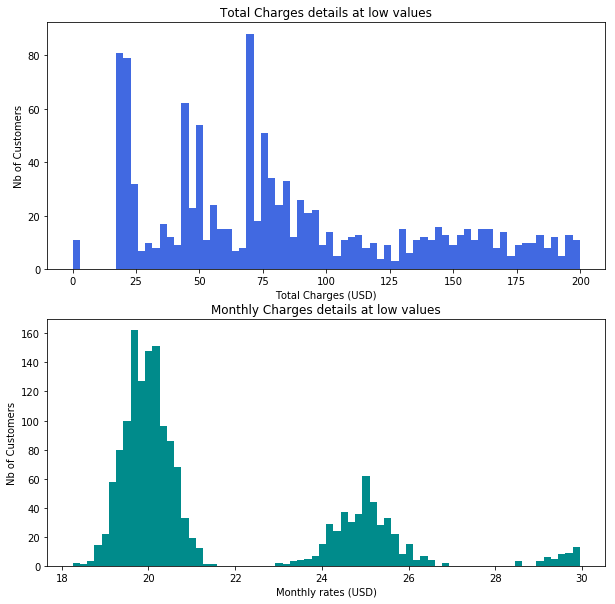

In [119]:
# Making sure the low values do not hide some bizarre value for Monthly Charges
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(data[data.TotalCharges<200].TotalCharges,bins=70,color='royalblue') 
plt.title('Total Charges details at low values')
plt.ylabel('Nb of Customers')
plt.xlabel('Total Charges (USD)')

plt.subplot(2, 1, 2)
plt.hist(data[data.MonthlyCharges<30].MonthlyCharges,bins=70,color='darkcyan')
plt.title('Monthly Charges details at low values')
plt.ylabel('Nb of Customers')
plt.xlabel('Monthly rates (USD)')
plt.show()

# Total Charges and Monthly Rates small values
Nothing surprising here, there is indeed a signficant of low values, with a peak for Monthle Charges around $20/Month and a Total charges just above $20 for Total charges.
The concern could have been around having a very large "no charge" or Free population that would have a very different behavior from the rest of the population.

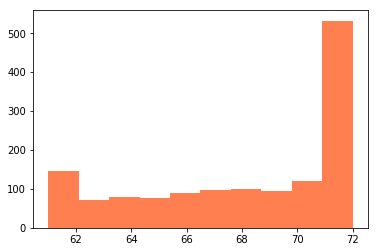

In [120]:
#The "peak" at 72 for tenure seems to look like a truncation of the tenure, would need to investigate.
plt.hist(data[data.tenure > 60].tenure,color="coral") 
plt.show()

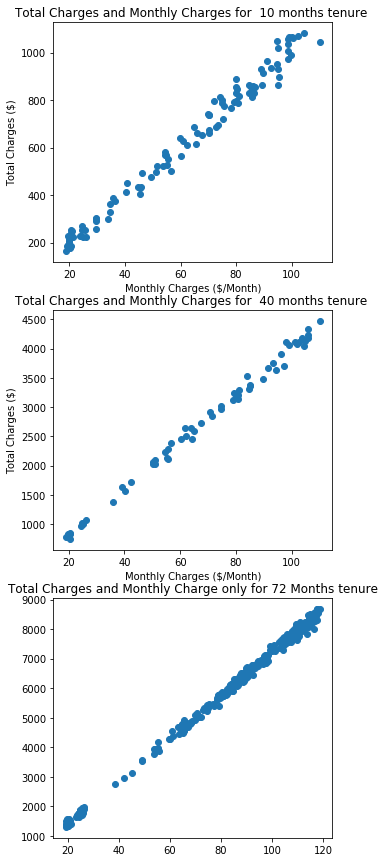

In [121]:
#No there is indeed a lot of people with a tenure of 72, 
#or this is the reference point for the data from 72 months ago.
#Even at 72 month tenure Total Charges are coherent with Monthly Charges
#When the model is sensitive to multicollinearity, like regression, we would need to exclude Total Charges.

min_tenure,max_tenure, tenure_step = 10,70,30
n_plot = (max_tenure-min_tenure)//tenure_step + 1
plt.figure(figsize=(5, 5*n_plot))
for (i,tenure) in enumerate(range(min_tenure,max_tenure,tenure_step)):
    this_tenure = data[data.tenure == tenure]
    plt.subplot(n_plot, 1, (i+1))
    plt.scatter(this_tenure.MonthlyCharges,this_tenure.TotalCharges)
    plt.title('Total Charges and Monthly Charges for  %s months tenure '%tenure)
    plt.ylabel('Total Charges ($)')
    plt.xlabel('Monthly Charges ($/Month)')

    
plt.subplot(n_plot, 1, n_plot)
tenure_72 = data[data.tenure == 72]
plt.scatter(tenure_72.MonthlyCharges,tenure_72.TotalCharges)
plt.title('Total Charges and Monthly Charge only for 72 Months tenure')

plt.show()

# 72 Months tenure
There is a large population at 72 Months.

For 3 different tenures, including the 72 Months one, we see the same relationship between Total Charges and Monthly Charges.

In case of a truncation of the tenure, we should have seem a Total Charges that was no longer proportionnal to Monthly Charges for the 72 Months tenure.

Looking at the correlation below, we can also confirm there is a multicollinearity between tenure, Total Charges and Monthly Rates. We might need to drop the Total Charges if the model used can be sensitive to those.




In [122]:
#Indeed Total Charges are correlated with Montly Charges and tenure
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


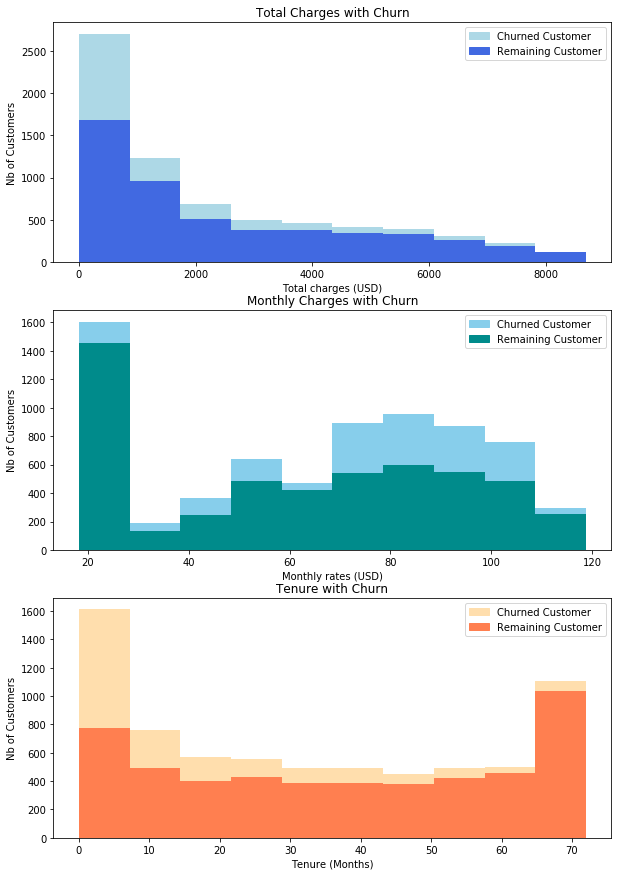

In [123]:
#Plotting including churn, there seems to be a highest churn for low tenure high monthly charges
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.hist([data[data.Churn=="No"].TotalCharges,[data[data.Churn=="Yes"].TotalCharges]],color=["royalblue","lightblue"],stacked=True) 
plt.title('Total Charges with Churn')
plt.ylabel('Nb of Customers')
plt.xlabel('Total charges (USD)')
churn_yes = mpatches.Patch(color='lightblue', label='Churned Customer')
churn_no = mpatches.Patch(color='royalblue', label='Remaining Customer')
plt.legend(handles=[churn_yes,churn_no])
plt.subplot(3, 1, 2)
plt.hist([data[data.Churn=="No"].MonthlyCharges,[data[data.Churn=="Yes"].MonthlyCharges]],color=["darkcyan","skyblue"],stacked=True) 
plt.title('Monthly Charges with Churn')
plt.ylabel('Nb of Customers')
plt.xlabel('Monthly rates (USD)')
churn_yes = mpatches.Patch(color='skyblue', label='Churned Customer')
churn_no = mpatches.Patch(color='darkcyan', label='Remaining Customer')
plt.legend(handles=[churn_yes,churn_no])

plt.subplot(3, 1, 3)
plt.hist([data[data.Churn=="No"].tenure,[data[data.Churn=="Yes"].tenure]],color=["coral","navajowhite"],stacked=True) 
plt.title('Tenure with Churn')
plt.ylabel('Nb of Customers')
plt.xlabel('Tenure (Months)')
churn_yes = mpatches.Patch(color='navajowhite', label='Churned Customer')
churn_no = mpatches.Patch(color='coral', label='Remaining Customer')
plt.legend(handles=[churn_yes,churn_no])
plt.show()

plt.show()

# Churn and the Numeric parameters
Replotting the same histograms as previously, but this time including the Churn in a lighter color, we notice a higher churn for :
    - Shorter tenures
    - Higher Monthly rates

# Looking at categorical values

In [124]:
columns_to_categorize = list(data.select_dtypes(include='object').columns)
columns_to_categorize.remove('customerID')
data_all_num = data.drop(labels=['customerID'], axis=1).copy()
for column in columns_to_categorize:
    data[column] = pd.Categorical( data[column])
    dfDummies = pd.get_dummies(data[column], prefix = column,drop_first=True)
    data_all_num.drop(labels=[column], axis=1,inplace=True)
    data_all_num = pd.concat([data_all_num,dfDummies], axis=1)
    

In [125]:
data_all_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Initial assessment
There is not missing data for the caterigorical values.

In [127]:
#Just putting the Churn variable first to improve readability
data_all_num = data_all_num[['Churn_Yes'] + data_all_num.columns[:-1].tolist()]
all_corr= data_all_num.corr()

In [128]:
all_corr_sorted = all_corr.copy()
all_corr_sorted = all_corr_sorted.sort_values(by=['Churn_Yes'],ascending=False)

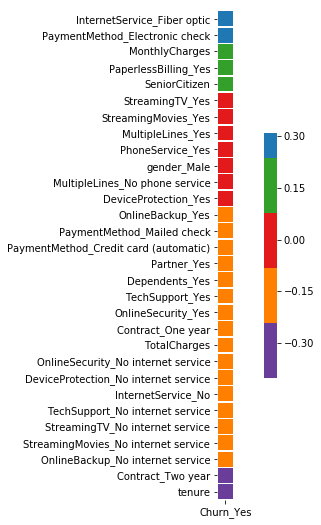

In [129]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(all_corr_sorted[all_corr_sorted.index != "Churn_Yes"][['Churn_Yes']],cmap=cmap,vmax=.31, vmin = -.4,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Overall parameters influence on the Churn
As noted previously, there is a high correlation between churn and tenure. The negative value make sense as the shorter the tenure the higher the Churn

## Highest correlations for categorical values
The notable correlation with Churn are :
- InternetService_Fiber: meaning the customer with Fiber optic have a higher churn
- PaymentMethoe_Electronic check: meaning the customer using Electronic check have a higher churn
- Contract_Two year: meaning the customers with a 2 year contract have a lower churn.

## Internet service _ No
Looking a the different caterigocial variable we also notice a cluster around "No Internet service".

On categorical variable is around the Internet service, defined as
>Customer’s internet service provider (DSL, Fiber optic, No)

When this parameter is "No", all other parameters "TechSupport", "StreamingTV", "StreamingMovies", "OnlineSecurity", "DeviceProtection" and, "OnlineBackup" are set to "No internet service"

In [ ]:
# Data from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

df = pd.read_csv(
    'NYPD_Complaint_Data_Historic.csv')